# Lab 4: Modelos Formales

En los modelos formales, no hay un mecanismo de generación de spikes. La ecuación que describe la dinámica subumbral es de la forma

$$\tau \dot{V} = f(V) + RI(t)$$

junto con el mecanismo de disparo:

$$
t^f: V(t^f) = V_{th} \\
\lim_{\delta \to 0} V(t^f + \delta) = V_{reset}
$$

A continuación veremos el comportamiento de algunos modelos formales

## Ejercicio 1: Leaky Integrate and Fire

El modelo LIF es de la forma

$$
\tau \dot{V} = -(V - V_{rest}) + R I(t)
$$

Asuma que $V_{th} = -55.0$mV, $V_{reset}=V_{rest}=-75.0$mV, $\tau_m = 10.0$, $R=0.1$, $V(0)=-75.0$. Para todos los protocolos use un método de Euler con $dt = 0.1$

1. Simule una neurona LIF usando un protocolo de corriente $I = 100$pA entre $t = [50, 150]ms$.
2. Simule una neurona LIF usando un protocolo de corriente $I = 300$pA entre $t = [50, 150]ms$.
3. Simule la neurona LIF usando $I(t) = A(1 + \sin(\omega t))$, con $\omega = 0.5$ y $A = 200$pA

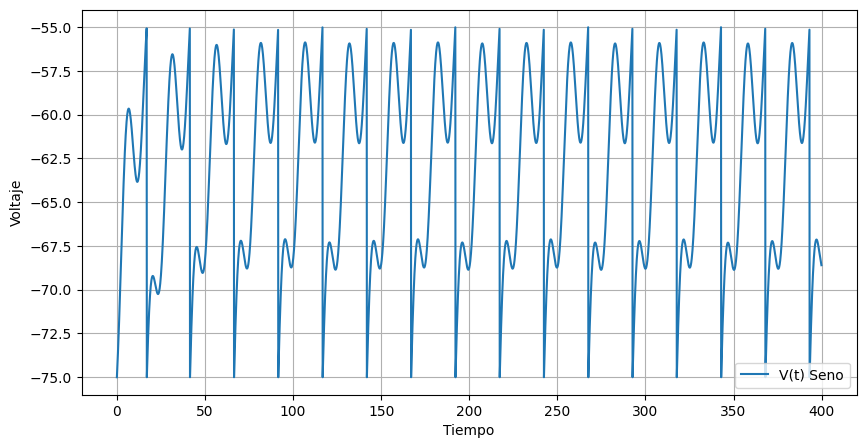

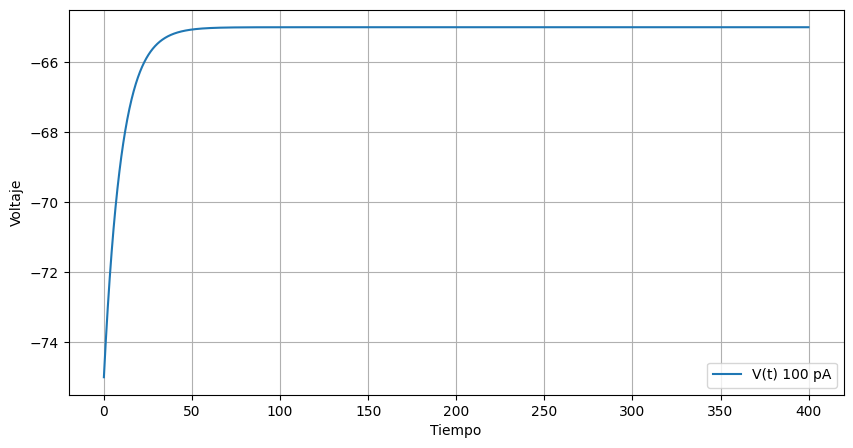

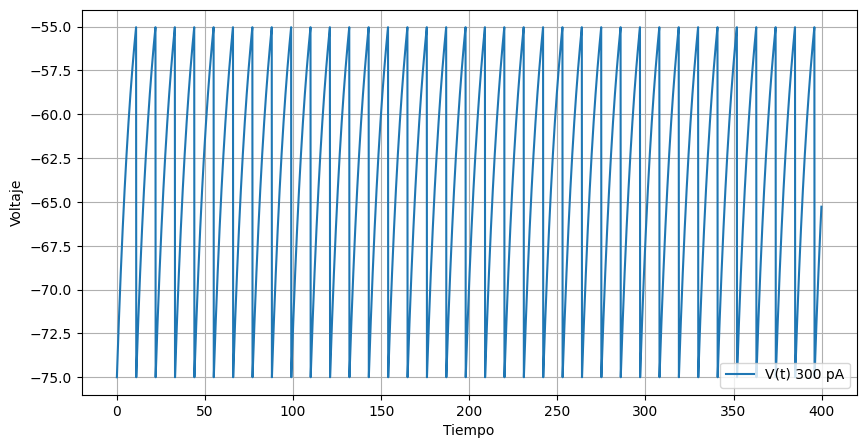

In [ ]:
# TODO
import matplotlib.pyplot as plt
import numpy as np

Vth = -55
Vrest = -75
Tm = 10
R = 0.1
V0 = -75

dt = 0.1 # Pasos

A = 200
w = 0.5

t_final = 400
N = int(t_final/dt)

def I_seno(t):
  return A*(1 + np.sin(w*t))

Voltajes_seno = [V0]
Voltajes_100 = [V0]
Voltajes_300 = [V0]
Tiempos = np.arange(0, t_final, dt)

for i in range(1,N):
    # Voltajes con la función seno
    V_prev_seno = Voltajes_seno[-1]
    dV = (-(V_prev_seno - Vrest) + R * I_seno(Tiempos[i])) / Tm
    V_new_seno = V_prev_seno + dV * dt
    if V_new_seno >= Vth:
        V_new_seno = Vrest

    Voltajes_seno.append(V_new_seno)

    # Voltajes con 100 de pA
    V_prev_100 = Voltajes_100[-1]
    dV = (-(V_prev_100 - Vrest) + R * 100) / Tm
    V_new_100 = V_prev_100 + dV * dt
    if V_new_100 >= Vth:
        V_new_100 = Vrest

    Voltajes_100.append(V_new_100)

    # Voltajes con 300 de pA
    V_prev_300 = Voltajes_300[-1]
    dV = (-(V_prev_300 - Vrest) + R * 300) / Tm
    V_new_300 = V_prev_300 + dV * dt
    if V_new_300 >= Vth:
        V_new_300 = Vrest

    Voltajes_300.append(V_new_300)

# Grafica del seno
plt.figure(figsize=(10,5))
plt.plot(Tiempos, Voltajes_seno, label='V(t) Seno')
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')
plt.legend()
plt.grid(True)
plt.show()


# Grafica con 100pA
plt.figure(figsize=(10,5))
plt.plot(Tiempos, Voltajes_100, label='V(t) 100 pA')
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')
plt.legend()
plt.grid(True)
plt.show()


# Grafica con 300pA
plt.figure(figsize=(10,5))
plt.plot(Tiempos, Voltajes_300, label='V(t) 300 pA')
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')
plt.legend()
plt.grid(True)
plt.show()



## Ejercicio 2:

Compute la curva f-I y compare sus resultados con lo esperado teóricamente, i.e:

$$
f(I_0) = -\frac{1}{\tau_m} \log \left( \frac{R I_0}{-(V_{th} - V_{rest})+R I_0}\right)
$$

# Solución (Ejercicio 2):

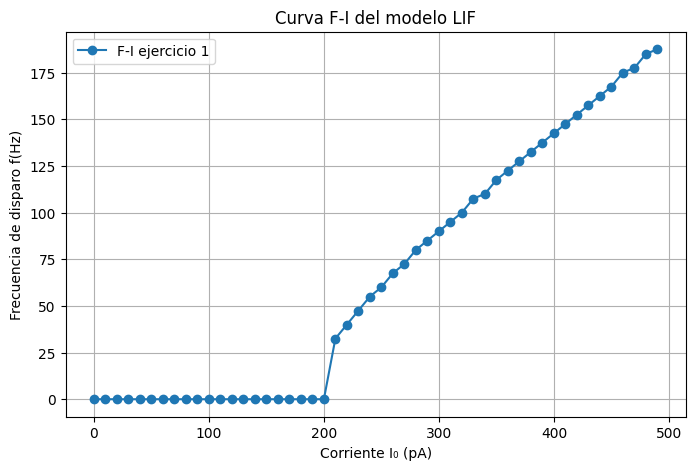

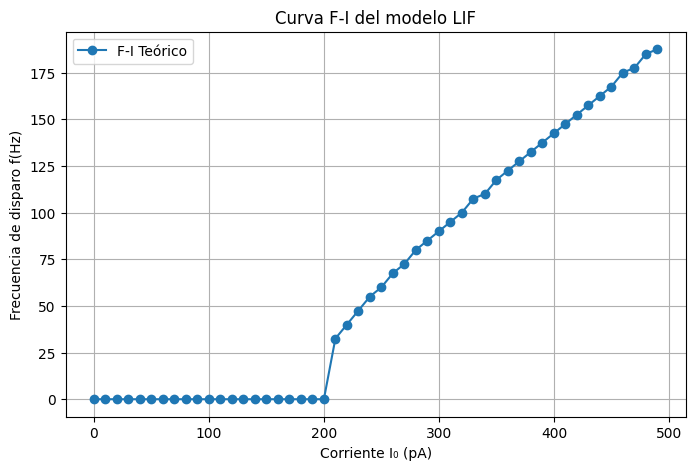

In [ ]:
# ---- CURVA F-I DEL EJERCICIO ANTERIOR ----

# Generar las corrientes

I_values = np.arange(0, 500, 10)
frecuencias = []

# Itero para cada corriente

for I0 in I_values:
  V = Vrest
  spikes = 0

  # Para lo tiempos del ejercicio anterior
  for t in Tiempos:
    dV = (-(V - Vrest) + R * I0) / Tm
    V += dV * dt
    if V >= Vth:
      spikes += 1
      V = Vrest
  f = spikes / (t_final / 1000)
  frecuencias.append(f)

# ---- F-I TEÓRICO ------

def V_fi_teorico(I0):
  if R * I0 <= (Vth - Vrest):
    return 0
  V_teorico = -1/Tm * np.log( R * I0/ R*I0 - (Vth - Vrest))
  V_teorico *= 1000 #Convertir a Hz
  return V_teorico

calc_fi_teorico = [V_fi_teorico(I0) for I0 in I_values]

# ---- GRÁFICAS ----

plt.figure(figsize=(8,5))
plt.plot(I_values, frecuencias, 'o-', label='F-I ejercicio 1')
plt.xlabel('Corriente I₀ (pA)')
plt.ylabel('Frecuencia de disparo f(Hz)')
plt.title('Curva F-I del modelo LIF')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(I_values, frecuencias, 'o-', label='F-I Teórico')
plt.xlabel('Corriente I₀ (pA)')
plt.ylabel('Frecuencia de disparo f(Hz)')
plt.title('Curva F-I del modelo LIF')
plt.grid(True)
plt.legend()
plt.show()



## Ejercicio 3:

En ocasiones puede ser útil hacer que su código detecte automáticamente cuándo una condición determinada se cumple. Por ejemplo que su código pueda detectar automáticamente cuándo el potencial de membrana pasa por $V_{th}$ para así dar el tratamiento adecuado a su problema. -En nuestro caso resetear el potencial de membrana a $V_{rest}$-.

Para ello es útil usar una rutina automática de detección de eventos. solve_ivp tiene la opción **events** que trata precisamente este tipo de problemas. Intente leer la documentación sobre cómo implementar la rutina de detección de eventos en su problema y simule una neurona LIF sujeta a una corriente constante $I = 300$pA.

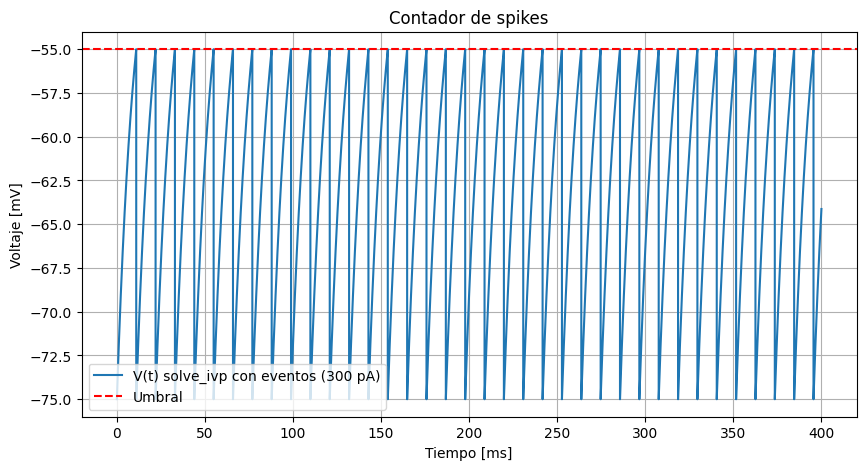

Total de spikes detectados: 36


In [ ]:
from scipy.integrate import solve_ivp

# Declaramos la función LIF
def lif(t, V, Tm, R, I0, Vrest):
  return (-(V - Vrest) + R * I0) / Tm

# Toca hacer que solve_ivp detecte automáticamente cuando V = Vth
# Events recibe una o varias funciones que describen lo que puede cumplirse durante la integración, y busca lo ceros(0) de esas funciones.

def evento_umbral(t, V):
  return V[0] - Vth #  V es la solción de solve_ivp.

# Solve_ivp: terminal y la direction
evento_umbral.terminal = True  # Este parámetro se usa para detener la integración cuando encuentre que el resultado es 0.
evento_umbral.direction = 1    # Este parámetro, si se coloca en 1, detecta cuándo la integración pasa de negativo a positivo

# direction detecta cuándo el Voltaje(V) está en el spike; porque antes del spike es V-Vth < 0 y luego del spike es V-Vth > 0

# Para la detección de eventos en la simulación con solve_ivp:

I0 = 300
t0 = 0.0
tf = t_final
V0 = Vrest
spike_times = []
sol_t = []
sol_v = []

# Tenemos que ejecutar solve_ivp desde t0 hasta t_final

while t0 < tf:
  sol = solve_ivp(
      fun=lambda t, y: lif(t, y, Tm, R, I0, Vrest),
      t_span=(t0, tf),
      y0=[V0],
      events=evento_umbral,
      max_step=dt
  )
  sol_t.extend(sol.t.tolist())
  sol_v.extend(sol.y[0].tolist())

  # solve_ivp devuelve los eventos en t_events, si se detectó un evento, es que .terminal se ejecutó ó .direction, es decir, hay un spike.
  if sol.t_events and len(sol.t_events[0]) > 0: # Condición cuando se detecta un spike
    t_spike = sol.t_events[0][0]
    # Guardamos los spikes detectados durante la ejecución del evento
    spike_times.append(t_spike)

    # reset al potencial de reposo
    V0 = Vrest
    t0 = t_spike + 0.00001  # (1e-6->Tiempo muy pequeño,  podríamos colocarlo aquí, para representar un tiempo luego del spike)
  else:
    break

# Graficar los reultados
plt.figure(figsize=(10,5))
plt.plot(sol_t, sol_v, label='V(t) solve_ivp con eventos (300 pA)')
plt.axhline(Vth, color='r', linestyle='--', label='Umbral')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Voltaje [mV]')
plt.title('Contador de spikes')
plt.legend()
plt.grid(True)
plt.show()

#
print(f"Total de spikes detectados: {len(spike_times)}")

#Nota ejercicio 3:

Lo que entendí: Events recibe una función que sirve como condición para disparar eventos, y con terminate y con direction, podemos detectar cuando esa función tiene cambios, es decir, cuando es 0 (Con terminate) ó cuando tiene cambios de pendiente (con direction, que puede ser 0, -1 o 1), esto lo que hace es que solve_ivp cuando detecte una de estas condiciones dispare un evento y lo almacena en .t_events.

Para este caso hice un **contador de spikes**, pero digamos que necesitamos saber cuándo es la fase de disparo rápido del spike, es decir, cuándo se va a acelerar el voltaje para generar el spike, tomaríamos la segunda derivada del modelo (LIF) y la colocaríamos en .events de solve_ivp, para detectar el momento justo cuando la función cambia de aceleración.


## Ejemplo de función para cambio en la aceleración (Segunda derivada):

```
def evento_subida_rapida(t, y, Tm, R, I0, Vrest):
    V = y[0]
    dVdt = (-(V - Vrest) + R * I0) / Tm
    d2Vdt2 = -dVdt / Tm
    return d2Vdt2
```

Si metemos esto como condición en Events, va a detectar el cambio de pendiente y a partir de ahí, podríamos detectar el disparo rápido del spike.
